In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_columns', None)

In [48]:
data = pd.read_csv('Cleaned_data.csv')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day,age_group,Hour
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8,2,23-28,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8,2,23-28,1
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8,2,38-43,1
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,8,2,38-43,1
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,8,2,23-28,1


In [49]:
data['date'] = pd.to_datetime(data['date'])

In [50]:
salary_df = pd.DataFrame({"customer_id": data.customer_id.unique()})
salary_df.head()

,customer_id
0,CUS-2487424745
1,CUS-2142601169
2,CUS-1614226872
3,CUS-2688605418
4,CUS-4123612273


In [51]:
from statistics import mode
df_freq = []
df_amount = []

for customer in range(len(salary_df)):
    salary = data.loc[(data.customer_id == salary_df.customer_id[customer]) & (data.txn_description == "PAY/SALARY"), ["date", "amount"]].groupby("date", as_index = False).sum()
    count = len(salary)
    if count == 0:
        df_amount.append(np.nan)
        df_freq.append(np.nan)
    else:
        days_between_payments = []
        for date in range(len(salary)-1):
            days_between_payments.append((salary.date[date + 1] - salary.date[date]).days)
        df_freq.append(max(days_between_payments))
        df_amount.append(mode(salary.amount))

salary_df["salary_freq"] = df_freq
salary_df["salary_amount"] = df_amount       
salary_df["annual_salary"] = salary_df["salary_amount"] / salary_df["salary_freq"] * 365.25
salary_df.head()
income = salary_df['annual_salary'].to_list()

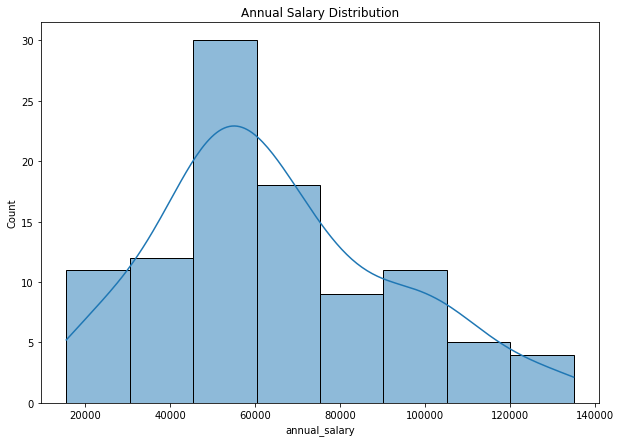

In [52]:
plt.figure(figsize = (10,7))
sns.histplot(salary_df['annual_salary'], kde = True)
plt.title('Annual Salary Distribution')
plt.show()

## Predictor Variables

In [53]:
data.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day,age_group,Hour
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8,2,23-28,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8,2,23-28,1


### Age

In [54]:
da = data.groupby('customer_id').agg({'customer_id':'first', 'age':'first'}).reset_index(drop = True)
age = da['age'].to_list()
age[:5]

[53, 21, 28, 34, 34]

### Gender

In [55]:
dg = data.groupby('customer_id').agg({'customer_id':'first', 'gender':'first'}).reset_index(drop = True)
gender = dg['gender'].to_list()
gender[:5]

['F', 'M', 'M', 'F', 'F']

### Weekly Transactions

In [56]:
count = data.groupby('customer_id').agg({'customer_id':'first', 'transaction_id':'count'}).reset_index(drop = True)
total_days = data['date'].nunique()
count['weekly_transactions'] = count['transaction_id'].divide(total_days).multiply(7)
weekly_transactions = count['weekly_transactions'].to_list()
weekly_transactions[:5]

[5.615384615384616,
 7.692307692307693,
 6.153846153846153,
 9.076923076923077,
 18.846153846153847]

### Max Transaction Amount 

In [57]:
max_amt = data.groupby('customer_id').agg({'customer_id':'first', 'amount':'max'}).reset_index(drop = True)
max_amt.head()
max_amt = max_amt['amount'].to_list()
max_amt[:5]


[970.47, 3578.65, 1916.51, 1711.39, 3903.73]

In [58]:
data['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

### Average  Spending

In [59]:
avg_spending = data[data['movement'] == 'debit'].groupby('customer_id').agg({'customer_id':'first',
                                                              'amount':'mean'}).reset_index(drop = True)
avg_spend = avg_spending['amount'].to_list()
avg_spend[:5]

[60.88099999999999,
 96.06258064516129,
 74.48027027027028,
 64.1214285714286,
 36.65802521008405]

In [60]:
customers = data.groupby('customer_id').agg({'customer_id':'first'}).reset_index(drop = True)
customers = customers['customer_id'].to_list()
customers[:5]

['CUS-1005756958',
 'CUS-1117979751',
 'CUS-1140341822',
 'CUS-1147642491',
 'CUS-1196156254']

### Final DataFrame

In [61]:
df = pd.DataFrame(data = {'customer_id':customers,
                         'age':age,
                         'gender':gender,
                         'weekly_transactions':weekly_transactions,
                         'max_transaction':max_amt,
                         'avg_spending':avg_spend,
                         'Annual_income':income})
df.head()

,customer_id,age,gender,weekly_transactions,max_transaction,avg_spending,Annual_income
0,CUS-1005756958,53,F,5.615385,970.47,60.881000,52891.852500
1,CUS-1117979751,21,M,7.692308,3578.65,96.062581,52289.711786
2,CUS-1140341822,28,M,6.153846,1916.51,74.480270,46547.981786
3,CUS-1147642491,34,F,9.076923,1711.39,64.121429,60534.969643
4,CUS-1196156254,34,F,18.846154,3903.73,36.658025,55728.801429


### Feature Preprocessing

In [62]:
df['gender'] = df['gender'].replace({'F':0,
                                    'M':1})
df.head()

,customer_id,age,gender,weekly_transactions,max_transaction,avg_spending,Annual_income
0,CUS-1005756958,53,0,5.615385,970.47,60.881000,52891.852500
1,CUS-1117979751,21,1,7.692308,3578.65,96.062581,52289.711786
2,CUS-1140341822,28,1,6.153846,1916.51,74.480270,46547.981786
3,CUS-1147642491,34,0,9.076923,1711.39,64.121429,60534.969643
4,CUS-1196156254,34,0,18.846154,3903.73,36.658025,55728.801429


<AxesSubplot:title={'center':'Correlation Matrix'}>

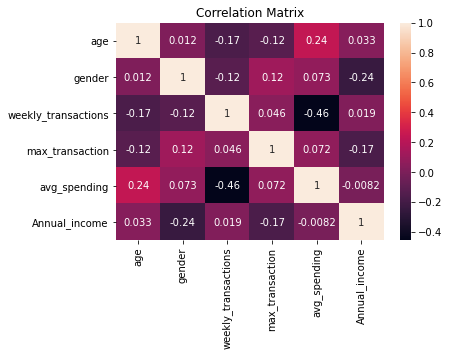

In [63]:
cm = df[['age', 'gender', 'weekly_transactions',
       'max_transaction', 'avg_spending', 'Annual_income']].corr()
plt.title('Correlation Matrix')
sns.heatmap(cm, annot = True)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Annual_income', axis = 1), df['Annual_income'], test_size = 0.3)

### Scaling

In [65]:
X = X_train.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = ['age', 'weekly_transactions', 'max_transaction', 'avg_spending']
X[col] = scaler.fit_transform(X[col])

In [66]:
X.head()

,customer_id,age,gender,weekly_transactions,max_transaction,avg_spending
95,CUS-72755508,0.369565,0,0.059675,0.073124,0.234415
81,CUS-3989008654,0.152174,1,0.066908,0.255673,0.202019
84,CUS-4142663097,0.347826,0,0.269439,0.356128,0.309412
64,CUS-3174332735,0.021739,0,0.047016,0.375417,0.263586
12,CUS-1433879684,0.130435,1,0.235081,0.100736,0.106020


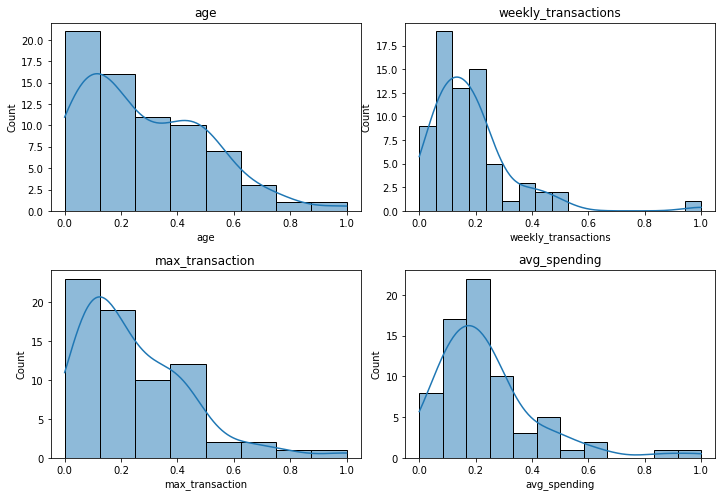

In [67]:
cols = ['age', 'weekly_transactions', 'max_transaction', 'avg_spending']
n=1
plt.figure(figsize = (10,10))
for col in cols:
    if n<6:
        plt.subplot(3,2,n)
        sns.histplot(X[col], kde = True)
        plt.title(col)
        n+=1
plt.tight_layout()
plt.show()

**Most of our features are right skewed**

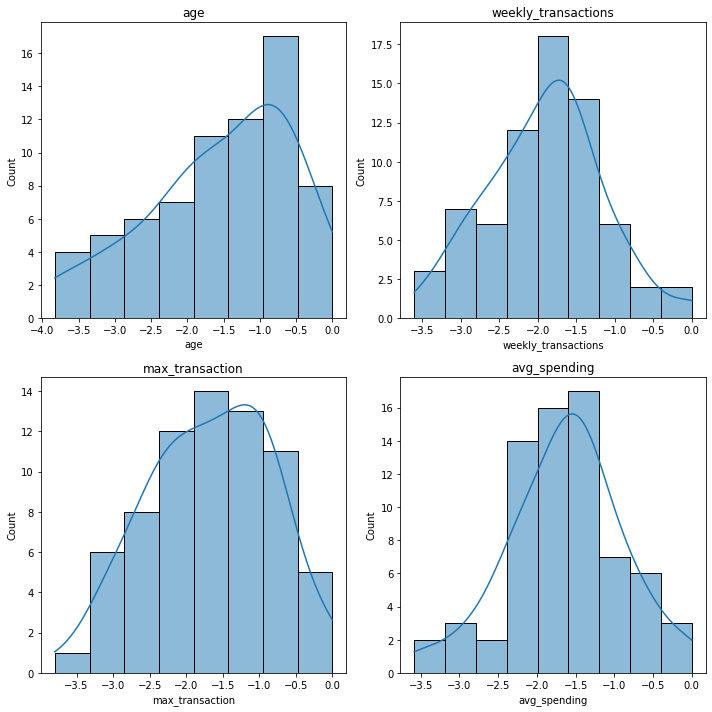

In [68]:
x = X.copy()
for col in cols:
    for row in x.index:
        if x.loc[row, col] == 0:
            pass
        else:
            x.loc[row, col] = np.log(x.loc[row, col])

            
plt.figure(figsize = (10,10))
n=1
for col in cols:
    if n<=4:
        plt.subplot(2,2,n)
        sns.histplot(x[col], kde = True)
        plt.title(col)
        n+=1
plt.tight_layout()
plt.show()

**Now it is near normally distributed**

In [69]:
x.head()

,customer_id,age,gender,weekly_transactions,max_transaction,avg_spending
95,CUS-72755508,-0.995428,0,-2.818850,-2.615603,-1.450663
81,CUS-3989008654,-1.882731,1,-2.704440,-1.363858,-1.599393
84,CUS-4142663097,-1.056053,0,-1.311412,-1.032465,-1.173082
64,CUS-3174332735,-3.828641,0,-3.057261,-0.979717,-1.333375
12,CUS-1433879684,-2.036882,1,-1.447824,-2.295249,-2.244126


In [70]:
x.drop('customer_id', axis = 1, inplace = True)
x.head()

,age,gender,weekly_transactions,max_transaction,avg_spending
95,-0.995428,0,-2.818850,-2.615603,-1.450663
81,-1.882731,1,-2.704440,-1.363858,-1.599393
84,-1.056053,0,-1.311412,-1.032465,-1.173082
64,-3.828641,0,-3.057261,-0.979717,-1.333375
12,-2.036882,1,-1.447824,-2.295249,-2.244126


In [71]:
y_train.head()

95    101569.241786
81     45027.498214
84     18705.756964
64     54826.894821
12     24020.666250
Name: Annual_income, dtype: float64

### Target Variable

<AxesSubplot:xlabel='Annual_income', ylabel='Count'>

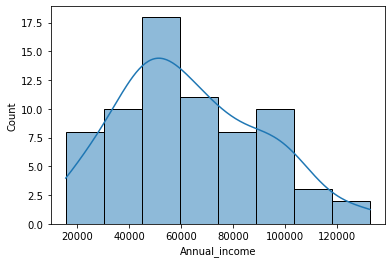

In [72]:
sns.histplot(y_train, kde = True)

In [73]:
y = pd.DataFrame(data = {'Annual_income':y_train})
sc = MinMaxScaler()
y[['Annual_income']] = sc.fit_transform(y[['Annual_income']])

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [75]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(random_state=0)
model1.fit(x,y)

DecisionTreeRegressor(random_state=0)

### Test Data

In [76]:
X_test.head()

,customer_id,age,gender,weekly_transactions,max_transaction,avg_spending
66,CUS-3201519139,37,1,2.846154,1123.08,141.364400
41,CUS-2317998716,19,1,7.461538,2639.76,32.715222
5,CUS-1220154422,25,0,5.769231,2282.36,67.935147
29,CUS-1892177589,44,1,8.923077,2887.34,53.626091
2,CUS-1140341822,28,1,6.153846,1916.51,74.480270


In [77]:
X_test.drop('customer_id', axis = 1, inplace = True)

In [78]:
X = X_test.copy()
col = ['age', 'weekly_transactions', 'max_transaction', 'avg_spending']
X[col] = scaler.transform(X[col])

In [79]:
X.head()

,age,gender,weekly_transactions,max_transaction,avg_spending
66,0.413043,1,0.021700,0.066233,0.737978
41,0.021739,1,0.130199,0.249850,0.070095
5,0.152174,0,0.090416,0.206582,0.286597
29,0.565217,1,0.164557,0.279824,0.198637
2,0.217391,1,0.099458,0.162290,0.326831


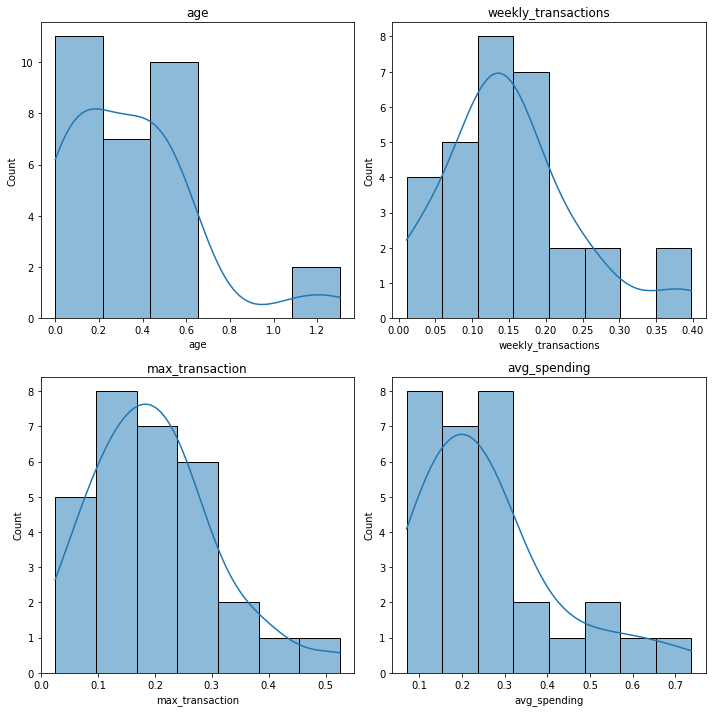

In [80]:
plt.figure(figsize = (10,10))
n=1
for col in col:
    if n<=4:
        plt.subplot(2,2,n)
        sns.histplot(X[col], kde = True)
        plt.title(col)
        n+=1
plt.tight_layout()
plt.show()

In [81]:
col = ['age', 'weekly_transactions', 'max_transaction', 'avg_spending']
for col in col:
    for row in X.index:
        if X.loc[row, col] <= 0:
            pass
        else:
            X.loc[row, col] = np.log(X.loc[row, col])

In [82]:
X.head()

,age,gender,weekly_transactions,max_transaction,avg_spending
66,-0.884202,1,-3.830451,-2.714582,-0.303841
41,-3.828641,1,-2.038692,-1.386893,-2.657907
5,-1.882731,0,-2.403335,-1.577060,-1.249678
29,-0.570545,1,-1.804498,-1.273595,-1.616275
2,-1.526056,1,-2.308025,-1.818372,-1.118312


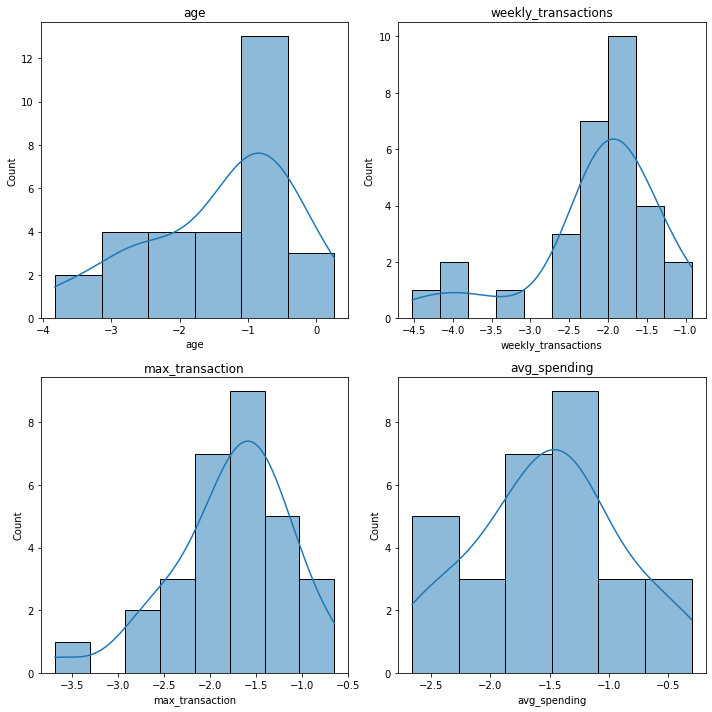

In [83]:

col = ['age', 'weekly_transactions', 'max_transaction', 'avg_spending']
plt.figure(figsize = (10,10))
n=1
for col in col:
    if n<=4:
        plt.subplot(2,2,n)
        sns.histplot(X[col], kde = True)
        plt.title(col)
        n+=1
plt.tight_layout()
plt.show()

In [84]:
y = pd.DataFrame(data = {'Annual_income':y_test})
y[['Annual_income']] = sc.transform(y[['Annual_income']])

In [85]:
y.head()

,Annual_income
66,0.356778
41,0.805599
5,0.499382
29,0.488439
2,0.264367


In [86]:
y_pred1 = model.predict(X)
y_pred2 = model1.predict(X)

In [87]:
y_pred2

array([0.73373483, 0.38109673, 0.16303116, 0.251396  , 0.595815  ,
       0.31766963, 0.04141601, 0.2061631 , 0.70984089, 0.0721937 ,
       0.58642746, 0.31848419, 0.29381798, 0.04870704, 0.29925509,
       0.3349914 , 0.16303116, 0.02685397, 0.16303116, 0.32889996,
       0.47231032, 0.70984089, 0.78694647, 0.29925509, 0.02685397,
       0.70984089, 0.2061631 , 0.70984089, 0.38279485, 0.38109673])

In [88]:
from sklearn.metrics import r2_score, mean_squared_error
R21 = r2_score(y,y_pred1)
R22 = r2_score(y,y_pred2)

In [89]:
print('''The R2 for Linear Regression Model is: {}
and for Decision Tree Regressor is: {}'''.format(R21,R22))

The R2 for Linear Regression Model is: -0.06082883476294798
and for Decision Tree Regressor is: -0.37997813201251995


In [90]:
y_pred2 = y_pred2.tolist()
y_pred2 = pd.DataFrame(data = {'salary':y_pred2})

In [91]:
y_pred1 = sc.inverse_transform(y_pred1)
y_pred2 = sc.inverse_transform(y_pred2)

In [92]:
print('RMSE for Linear Regression Model is: {}'.format(mean_squared_error(y_test, y_pred1)))
print('RMSE for Decision Tree Regressor Model is: {}'.format(mean_squared_error(y_test, y_pred2)))

RMSE for Linear Regression Model is: 829881584.9446027
RMSE for Decision Tree Regressor Model is: 1079550632.349989


**As R^2 is negative and RMSE is very large the model is a bad fit for the data and does not follow the trend of the data**